<a href="https://colab.research.google.com/github/tlapanco/recorrido-en-grafos/blob/main/Algoritmos_de_b%C3%BAsqueda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sistemas inteligentes
**Alumno:** Tlapanco **2019XXXXXX**

## Grafo
**Tipo:** No dirigido

**Número total de nodos:** 9

**Nodos:** A, B, C, D, E, F, G, H, I


Grafo: 


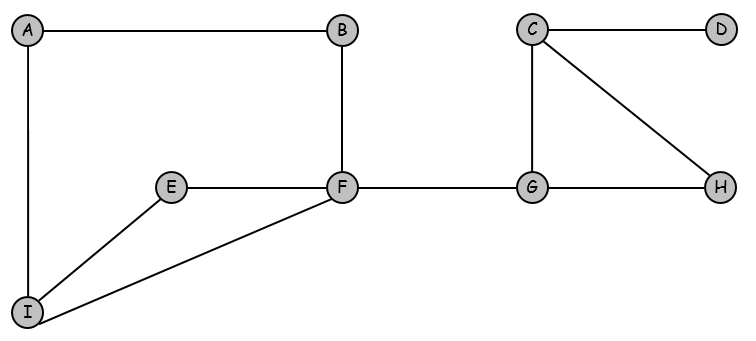

In [1]:
#Grafo a usar
from IPython.display import Image, display
print('Grafo: ')
display(Image('Grafo.png', width=500))

In [2]:
#Lista de adyacencia de nuestro grafo, almacenada en un diccionario
lista_adyacencia ={
    "A": ["B", "I"],
    "B": ["A", "F"],
    "C": ["D", "G", "H"],
    "D": ["C"],
    "E": ["F", "I"],
    "F": ["B", "E", "G", "I"],
    "G": ["C", "F", "H"],
    "H": ["C", "G"],
    "I": ["A", "E", "F"]
}

## Recorrido en anchura

1. Creación de diccionario donde se guardaran los estados de nuestro recorrido en anchura, el cual es creado a partir de nuestra lista de adyacencia y una lista que contendra el recorrido en anchura de nuestro grafo

In [3]:
recorrido ={}
for k in lista_adyacencia.keys():
    recorrido[k]= {"Visitado": "NO", "Nivel": -1, "Padre": None}

In [4]:
#Lista que contendra el recorrido en anchura de nuestro grafo
recorrido_anchura = []

2. Estado de nuestro diccionario antes de iniciar el recorrido:
Se creo un nuevo diccionario por cada clave del diccionario de lista de adyacencia, que en este caso son los nodos de nuestro grafo

> Cada diccionario cuenta con:

- Clave **"Visitado"**, la cual tiene como valor **"NO"** Se inicializa de esta manera, ya que al ser visitado en el recorrido, cambiara su valor a **"SI"** y no sera visitado nuevamente

- Clave **"Nivel"**,  este contiene el valor **-1**, el cual se actualizara constantemente por cada nodo visitado en nuestro recorrido, el nodo raíz incrementara a **0**, el cual sera el punto de partida del recorrido, sus vencinos tomaran el valor de **1** ya que se encuentran en el primer nivel a partir del nodo raíz y los vecinos del nivel uno, incrementaran su valor a **2** y asi constantemente hasta terminar de recorrer nuestro grafo

- Clave **"Padre"**, contiene un valor por defecto **None**, el cual, durante el recorrido sera reemplazado por el nodo que se encuentra directamente en el nivel anterior, del cual tomara su nivel para el calculo del mismo


In [5]:
recorrido

{'A': {'Visitado': 'NO', 'Nivel': -1, 'Padre': None},
 'B': {'Visitado': 'NO', 'Nivel': -1, 'Padre': None},
 'C': {'Visitado': 'NO', 'Nivel': -1, 'Padre': None},
 'D': {'Visitado': 'NO', 'Nivel': -1, 'Padre': None},
 'E': {'Visitado': 'NO', 'Nivel': -1, 'Padre': None},
 'F': {'Visitado': 'NO', 'Nivel': -1, 'Padre': None},
 'G': {'Visitado': 'NO', 'Nivel': -1, 'Padre': None},
 'H': {'Visitado': 'NO', 'Nivel': -1, 'Padre': None},
 'I': {'Visitado': 'NO', 'Nivel': -1, 'Padre': None}}

3. Implementación de nuestro algoritmo, haciendo uso de la librería **queue**, para hacer uso de una cola

In [6]:
from queue import Queue
n = input(print("Ingrese el nodo para inciar el recorrido: "))
recorrido[n]["Visitado"]= "SI"
recorrido[n]["Nivel"] += 1

cola = Queue()
cola.put(n)
while not cola.empty():
    nodo_sig = cola.get()
    recorrido_anchura.append(nodo_sig)
    for v in lista_adyacencia[nodo_sig]:
        if recorrido[v]["Visitado"] == "NO":
            recorrido[v]["Visitado"] = "SI"
            recorrido[v]["Padre"]= nodo_sig
            recorrido[v]["Nivel"] = recorrido[nodo_sig]["Nivel"] +1
            cola.put(v)



Ingrese el nodo para inciar el recorrido: 
NoneA


4. Estado de nuestro diccionario de recorrido, después de finalizar el proceso

In [7]:
recorrido

{'A': {'Visitado': 'SI', 'Nivel': 0, 'Padre': None},
 'B': {'Visitado': 'SI', 'Nivel': 1, 'Padre': 'A'},
 'C': {'Visitado': 'SI', 'Nivel': 4, 'Padre': 'G'},
 'D': {'Visitado': 'SI', 'Nivel': 5, 'Padre': 'C'},
 'E': {'Visitado': 'SI', 'Nivel': 2, 'Padre': 'I'},
 'F': {'Visitado': 'SI', 'Nivel': 2, 'Padre': 'B'},
 'G': {'Visitado': 'SI', 'Nivel': 3, 'Padre': 'F'},
 'H': {'Visitado': 'SI', 'Nivel': 4, 'Padre': 'G'},
 'I': {'Visitado': 'SI', 'Nivel': 1, 'Padre': 'A'}}

5. Recorrido en anchura a partir del nodo dado

In [8]:
print("Recorrido en anchura:", " ".join(recorrido_anchura))

Recorrido en anchura: A B I F E G C H D


## Recorrido en profundidad: Recursividad


1. Para el recorrido en profundidad, haremos uso de una función, de la cual recibirá 3 parametros, los cuales son:
- **l_adyacencia:** sera un diccionario dado la cual representara la lista de adyacencia el grafo
- **nodo_inicio:** el nodo del que se partira para poder iniciar el recorrid
- **recorrido:** Sera una lista en donde se iran almacenando los nodos del recorrido

In [9]:
#Funcion del recorrido en profundidad de un grafo
def r_profundidad(l_adyacencia, nodo_inicio, recorrido = []):
    #Este if verificara si el nodo se encuentra en el recorrido o no
  if nodo_inicio not in recorrido:
    #uso de la funcion append para agregar el nodo al arreglo del recorrido
    recorrido.append(nodo_inicio)
    #Condicional para finalizar un camino y retroceder un vivel en caso de que no haya nodos adyecientes al hacer uso de la recursividad
    if nodo_inicio not in l_adyacencia:
        return recorrido
    #ciclo for para recorrer nodos adyacentes haciendo uso de la lista de adyacencia dada
    for n_adyacente in l_adyacencia[nodo_inicio]:
        #uso de la recursividad para usar como instancia la funcion r_profundidad y reutilizarla
        recorrido = r_profundidad(l_adyacencia, n_adyacente, recorrido)

    #regresa el arreglo del recorrido en profundidad
  return recorrido

rec = r_profundidad(lista_adyacencia, "A")
print("Recorrido en profundidad: ", " ".join(rec))

Recorrido en profundidad:  A B F E I G C D H
